# Pymaceuticals, Inc.
### -----------------------------------------------

## Analysis

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss

# %matplotlib notebook
%matplotlib inline

# Study data files
mouse_data_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_study_data = pd.merge(study_results, mouse_data, how="left", on="Mouse ID")

# Display the data table for preview
merged_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [133]:
# Counting the total number of mice in study using unique Mouse ID's
len(merged_study_data["Mouse ID"].unique())

249

In [134]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = merged_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice = merged_study_data.loc[duplicate_rows,'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [135]:
# Clean the DataFrame by dropping duplicate mouse by its ID
clean_data = merged_study_data[merged_study_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [136]:
# Verifying the number of mice in the clean DataFrame
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
means = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sems = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
stdevs = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdevs,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line (created using help from ChatGPT)
summary_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdevs,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar & Pie Charts

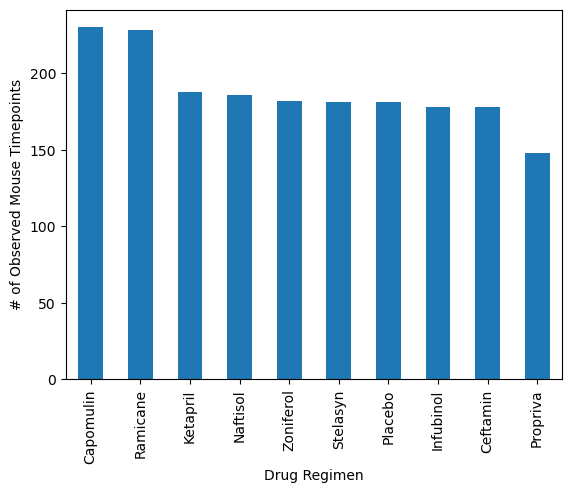

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

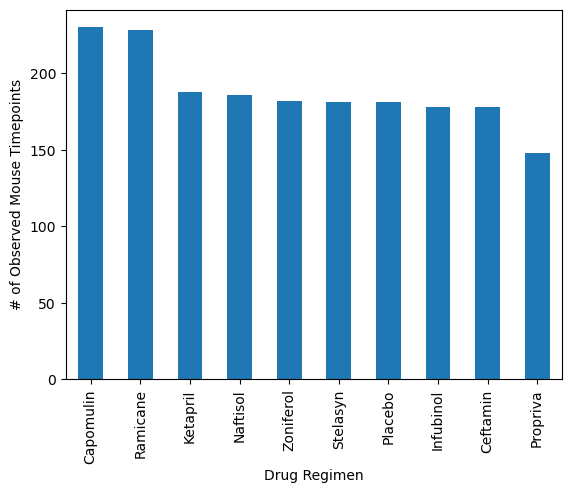

In [158]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using DataFrame.plot
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", rot=90)

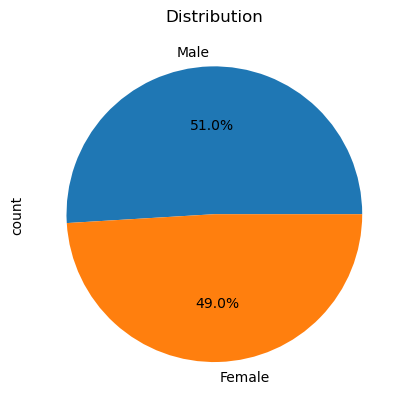

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_data.Sex.value_counts()
counts.plot(kind="pie", autopct='%.1f%%')
plt.title("Distribution")
plt.show()

<Axes: title={'center': 'Distribution of Male vs Female Mice'}>

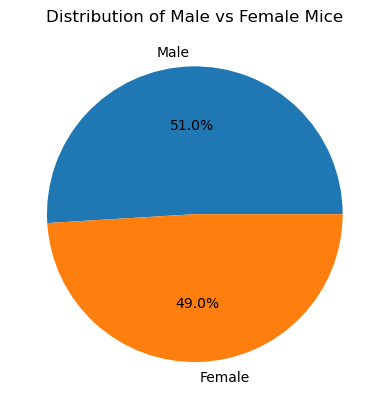

In [241]:
sex_counts_df = pd.DataFrame(clean_data["Sex"].value_counts())
sex_counts_df.plot(kind="pie", y="count", autopct="%.1f%%", legend=False, ylabel="", title="Distribution of Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [260]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
final_tumor = final_tumor.reset_index()
#print(final_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_result = final_tumor.merge(clean_data, on=['Mouse ID','Timepoint'], how="left")
print(merged_data_result)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [264]:
# Put promisiong treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list for tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_result.loc[merged_data_result["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s Potential Outliers: {outliers}")


Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


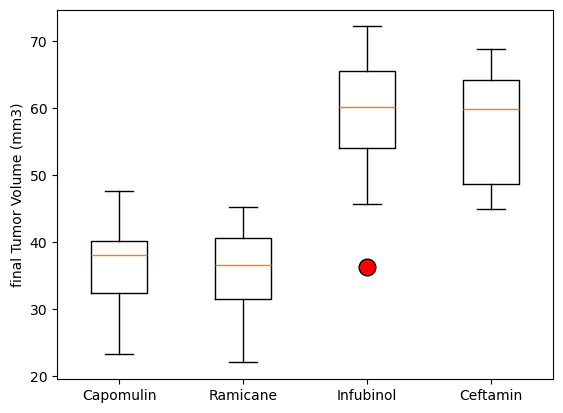

In [266]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
mark_outliers_red = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=mark_outliers_red)
plt.ylabel('final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

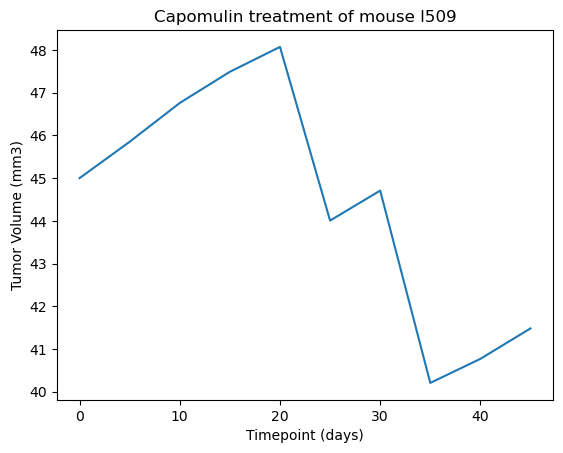

In [274]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']

# Random mouse selection
# random_mouse_id = capomulin_table['Mouse ID'].sample(1).values[0]

# get data for randomly selected mouse
# mouse_data = capomulin_table.loc[capomulin_table['Mouse ID'] == random_mouse_id]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

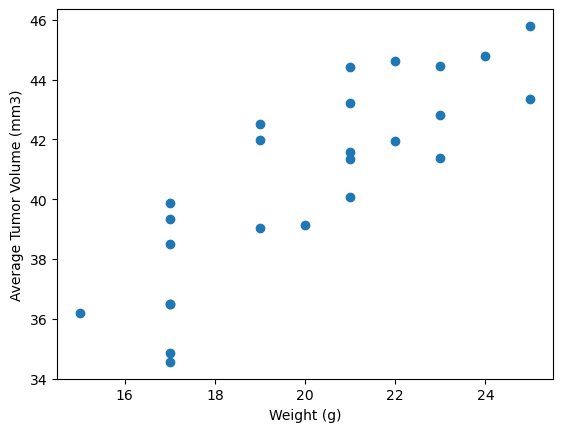

In [278]:
# Scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


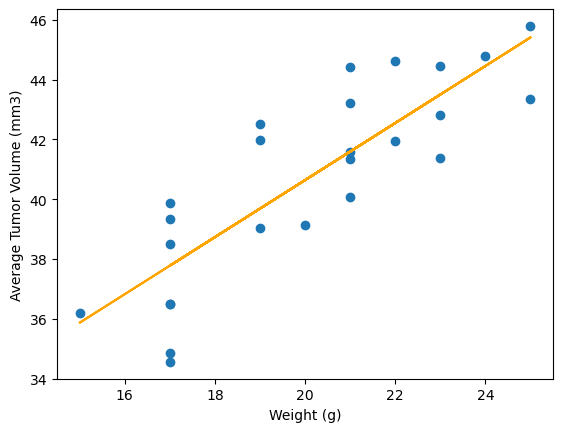

In [301]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(ss.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = ss.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Final Analysis